<a href="https://colab.research.google.com/github/SibeleTatiana/WebAggregat/blob/main/checkpoint_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Checkpoint 1: Deep Learning e AI**

## **Alunos:**
### RM 552915 - Sibele Tatiana
### RM 552603 - Diego Alves

# Considere a base de dados AirlineReviews.csv que contém a avaliação de clientes sobre voos comerciais realizados. Campos fornecidos:
  i. **CabinType**: Tipo da cabine

  ii. **EntertainmentRate**: Avaliação do entretenimento de bordo

  iii. **FoodRating**: Avaliação das refeições a bordo

  iv. **GroundServiceRating**: Avaliação do atendimento em solo

  v. **OriginCountry**: País de origem do voo

  vi. **OverallScore**: Avaliação geral

  vii. **Recommended**: Indicação se o passageiro recomendaria a linha aérea

  viii. **ValueRating**: Avaliação do custo-benefício da viagem

  ix. **ServiceRating**: Avaliação do serviço

  x. **SeatComfortRating**: Avaliação de conforto da poltrona



In [ ]:
#Importando as Bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler


In [ ]:
#Trasformei os dados em CVS em DataFrame

df = pd.read_csv('/home/AirlineReviews.csv')
df.head()

,Aircraft,AirlineName,CabinType,DateFlown,DatePub,EntertainmentRating,FoodRating,GroundServiceRating,OriginCountry,OverallScore,...,Route,SeatComfortRating,ServiceRating,Slug,Title,TravelType,TripVerified,ValueRating,WifiRating,unique_id
0,NaN,AB Aviation,Economy Class,November 2019,11th November 2019,0,4,4,Netherlands,9.0,...,Moroni to Moheli,4,5,ab-aviation,pretty decent airline,Solo Leisure,Trip Verified,3,0,d3b260fb-268b-4399-8a9b-2804825902c6
1,E120,AB Aviation,Economy Class,June 2019,25th June 2019,0,1,1,UnitedKingdom,1.0,...,Moroni to Anjouan,2,2,ab-aviation,Not a good airline,Solo Leisure,Trip Verified,2,0,307711df-268f-4698-97b8-45729b7d972e
2,Embraer E120,AB Aviation,Economy Class,June 2019,25th June 2019,0,1,1,UnitedKingdom,1.0,...,Anjouan to Dzaoudzi,2,1,ab-aviation,flight was fortunately short,Solo Leisure,Trip Verified,2,0,82bd2602-171d-4724-bde0-90b71621cdcf
3,NaN,Aerocaribbean,Economy Class,NaN,31st December 2010,0,0,0,Denmark,8.0,...,NaN,0,0,aerocaribbean,Aerocaribbean customer review,NaN,NaN,4,0,a927beb4-6244-4f5c-9dc3-09890aa3e616
4,NaN,Aerocaribbean,NaN,NaN,25th November 2010,0,0,0,UnitedKingdom,1.0,...,NaN,0,0,aerocaribbean,Aerocaribbean customer review,NaN,NaN,0,0,d7bea425-c58a-4a7e-8269-02e0e6516633


In [ ]:
#Idetificamos as colunas que seria nessesario damizar e os valores delas
df['CabinType'].value_counts()

,count
CabinType,
Economy Class,102735
Business Class,16474
Premium Economy,4816
First Class,2412


In [ ]:
df['OriginCountry'].value_counts()

,count
OriginCountry,
UnitedStates,39807
UnitedKingdom,22320
Australia,11692
Canada,10500
Germany,3560
...,...
Mali,1
BurkinaFaso,1
Madagascar,1


In [ ]:
df['Recommended'].value_counts()

,count
Recommended,
no,77597
yes,51858


### 1) Transforme a variável OriginCountry em 3 dummies indicando se a origem é “UnitedStates” ou “UnitedKingdom” ou qualquer outro valor

In [ ]:
#Realizamos a damização das colunas

df1 = df
df1['UnitedStates'] = df1.apply(lambda row: 1 if row['OriginCountry']=='UnitedStates' else 0, axis=1)
df1['UnitedKingdom'] = df1.apply(lambda row: 1 if row['OriginCountry']=='UnitedKingdom' else 0, axis=1)
df1['other_country'] = df1.apply(lambda row: 1 if row['OriginCountry'] not in ['UnitedStates', 'UnitedKingdom'] else 0, axis=1)
df1['Recommended'] = df1.apply(lambda row: 1 if row['Recommended']=='yes' else 0, axis=1)
df1['Economy Class'] = df1.apply(lambda row: 1 if row['CabinType']=='Economy Class' else 0, axis=1)
df1['Business Class'] = df1.apply(lambda row: 1 if row['CabinType']=='Business Class' else 0, axis=1)
df1['Premium Economy'] = df1.apply(lambda row: 1 if row['CabinType']=='Premium Economy' else 0, axis=1)
df1['First Class'] = df1.apply(lambda row: 1 if row['CabinType']=='First Class' else 0, axis=1)


### 2) Descarte qualquer coluna da tabela que não tenha sido citada anteriormente.

In [ ]:
#Limpamos as colunas necesarias
df2 = df1
df2 = df2.drop(['Aircraft','AirlineName','DateFlown','DatePub','Review','Route','Slug','Title','TripVerified','TravelType','WifiRating','unique_id','CabinType','OriginCountry'], axis='columns')
df2 = df2.dropna()
df2.head()

,EntertainmentRating,FoodRating,GroundServiceRating,OverallScore,Recommended,SeatComfortRating,ServiceRating,ValueRating,UnitedStates,UnitedKingdom,other_country,Economy Class,Business Class,Premium Economy,First Class
0,0,4,4,9.0,1,4,5,3,0,0,1,1,0,0,0
1,0,1,1,1.0,0,2,2,2,0,1,0,1,0,0,0
2,0,1,1,1.0,0,2,1,2,0,1,0,1,0,0,0
3,0,0,0,8.0,1,0,0,4,0,0,1,1,0,0,0
4,0,0,0,1.0,0,0,0,0,0,1,0,0,0,0,0


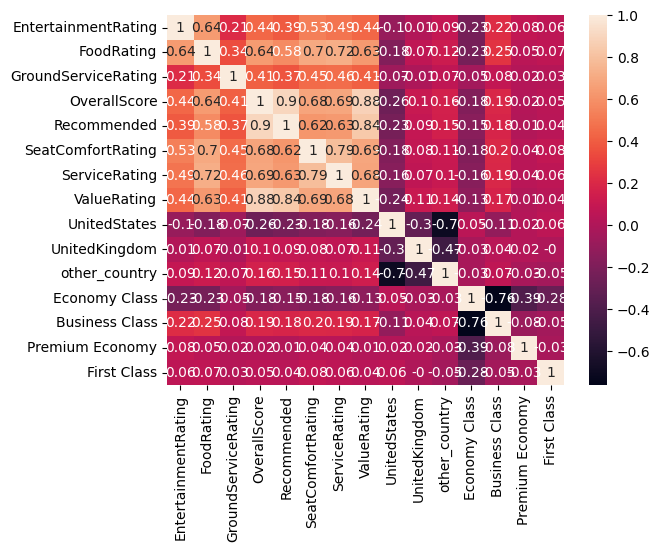

In [ ]:
# Criamos uma matriz de correlação para poder idetificar qual melhor relação com a variavel "OverallScore"
matrix = df2.corr().round(2)
sns.heatmap(matrix, annot=True)
plt.show()

## 3) Crie uma regressão linear simples para predizer o valor de OveralScore. Determine a melhor variável explicativa para a criação da regressão. Explique o motivo da sua escolha. Destaque o R² obtido.


In [ ]:
#Treinamos nosso modelo de Regreção linear simples usamos a relação "Recommended", pois foi a que melhor se destacou em relação
mode1 = LinearRegression(n_jobs=None, fit_intercept=True, copy_X=True)
y = df2['OverallScore']
x = df2[['Recommended']]

mode1.fit(x, y)
print("Nosso R² é de:", mode1.score(x, y), "Isso significa que o modelo prever bem, mas não toda variavel sozinha")



Nosso R² é de: 0.8187200869355598 Isso significa que o modelo prever bem, mas não toda variavel sozinha


## 4)  Crie uma regressão linear múltipla utilizando todas as variáveis contidas no modelo para para predizer o valor de OveralScore. Destaque o R² obtido.


In [ ]:
#Treinamos nosso modelo de Regreção linear múltipla
mode2 = LinearRegression(n_jobs=None, fit_intercept=True, copy_X=True)
y = df2['OverallScore']
x = df2.drop(['OverallScore'], axis=1)
mode2.fit(x, y)
mode2.score(x, y)
print("Nosso R² é de:", mode2.score(x, y), "Isso significa que o modelo prever bem, mas não toda variavel sozinha")

Nosso R² é de: 0.8813008847035008 Isso significa que o modelo prever bem, mas não toda variavel sozinha


## 5) Crie uma regressão polinomial para predizer o valor de OveralScore. Determine o melhor grau para a regressão polinomial. Justifique a sua escolha. Destaque o R² obtido.


In [ ]:
#Treinamos nosso modelo de Regreção Polinomial
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.99)

degree = 1
max_degree = 4

while True:
  poly_f = PolynomialFeatures(degree=degree)
  x_train_poly = poly_f.fit_transform(x_train.to_numpy())
  x_test_poly = poly_f.fit_transform(x_test.to_numpy())

  model = LinearRegression()
  model.fit(x_train_poly, y_train)
  score_train = model.score(x_train_poly, y_train)
  score_test = model.score(x_test_poly, y_test)
  print("Degree:", degree)
  print(score_train / score_test)

  if degree >= max_degree:
    break

  if score_train / score_test - 1 >= 0.2:
    break
  degree = degree + 1

print("Melhor grau:", degree - 1)
print("Score treino:", score_train)
print("Score test:", score_test)

Degree: 1
1.0062861185830008
Degree: 2
1.1298319728696269
Degree: 3
-6.385314704233688e-17
Degree: 4
-0.17909616299218487
Melhor grau: 3
Score treino: 0.9787169143794817
Score test: -5.464756463946073


## 6) Analise o R² obtido nos itens iii, iv e v. Indique qual foi o algoritmo que apresentou o maior R² e analise os motivos pelos quais este algoritmo apresentou a melhor métrica.

In [ ]:
print("Regressão linear simples com R²:", mode2.score(x, y))
print("Regressão linear múltipla com R²:",mode2.score(x, y))
print("Regressão polinomial com R² (treinamento):", (score_train))
print("Regressão polinomial com R² (teste):", (score_test))

# Identificar o melhor modelo baseado no R²

print(f"Analisamos os três modelos e identificamos que o R² mais alto foi obtido com a regressão polinomial com R² (treinamento): {score_train}")

Regressão linear simples com R²: 0.8813008847035008
Regressão linear múltipla com R²: 0.8813008847035008
Regressão polinomial com R² (treinamento): 0.9787169143794817
Regressão polinomial com R² (teste): -5.464756463946073
Analisamos os três modelos e identificamos que o R² mais alto foi obtido com a regressão polinomial com R² (treinamento): 0.9787169143794817


## 7) Crie uma matriz de correlação com as variáveis do modelo. Destaque as variáveis que possuem correlação forte positiva ou negativa com a variável de interesse. Explique por que tais variáveis são importantes.


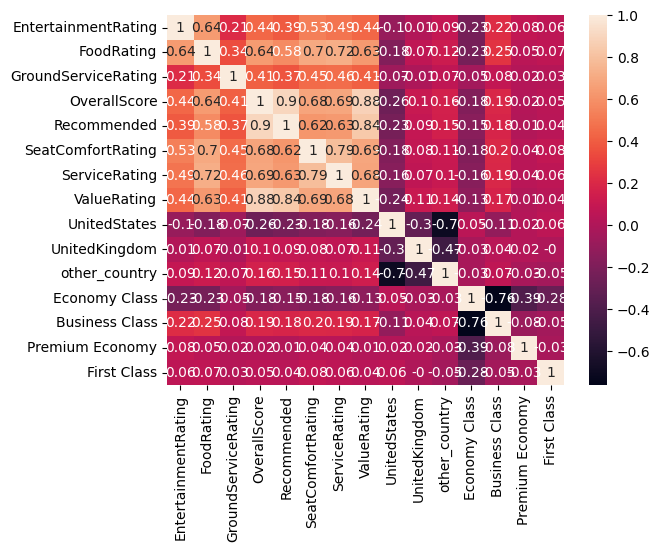

In [ ]:
# Criamos uma matriz de correlação para poder idetificar qual melhor relação com a variavel "OverallScore"
matrix = df2.corr().round(2)
sns.heatmap(matrix, annot=True)
plt.show()

## 8) Crie um novo campo chamado “Avaliação Positiva”. O valor deste campo deve ser 0 quando o OveralScore for menor que 5 e 1 nos demais casos. Crie uma regressão logística para predizer o valor de “Avaliação Positiva” utilizando todos os campos do dataset. Destaque a acurácia obtida.

In [ ]:
df3 = df2
df3['Avaliação_Positiva'] = df3.apply(lambda row: 1 if row['OverallScore'] > 5 else 0, axis=1)
df3 = df3.drop(['OverallScore'], axis=1)
df3.head()

,EntertainmentRating,FoodRating,GroundServiceRating,Recommended,SeatComfortRating,ServiceRating,ValueRating,UnitedStates,UnitedKingdom,other_country,Economy Class,Business Class,Premium Economy,First Class,Avaliação_Positiva”,Avaliação_Positiva
0,0,4,4,1,4,5,3,0,0,1,1,0,0,0,1,1
1,0,1,1,0,2,2,2,0,1,0,1,0,0,0,0,0
2,0,1,1,0,2,1,2,0,1,0,1,0,0,0,0,0
3,0,0,0,1,0,0,4,0,0,1,1,0,0,0,1,1
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
x = df3.drop('Avaliação_Positiva', axis='columns')
y = df3['Avaliação_Positiva']

# Dividir os dados em conjuntos de treino e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.75, random_state=42)

# Escalonar os dados
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Criar e treinar o classificador
classifier = LogisticRegression(max_iter=1000, solver='newton-cg', multi_class='multinomial')
classifier.fit(x_train_scaled, y_train)

# Fazer previsões no conjunto de teste
y_pred = classifier.predict(x_test_scaled)

# Fazer previsões no conjunto de teste
y_pred = classifier.predict(x_test_scaled)

# Calcular a acurácia
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo: {accuracy:.4f}')


Acurácia do modelo: 1.0000


## 9) Crie a matriz de confusão da regressão logística gerada no item anterior. Avalie os resultados da matriz de confusão.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


<Axes: >

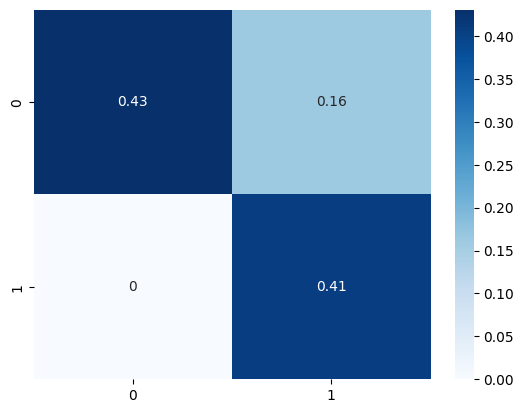

In [ ]:
y_pred = classifier.predict(x)
matrix = confusion_matrix(y, y_pred)
#sns.heatmap(matrix/np.sum(matrix), annot=True, fmt='.2%', cmap='Reds')
sns.heatmap(matrix/np.sum(matrix),annot=True,  cmap='Blues')

### 10) Explique, com suas palavras, qual a diferença entre uma regressão linear e uma regressão logística.


Regressão linear - Predizer um valor contínuo. A regressão linear tenta encontrar a melhor linha reta que se ajusta aos dados. Essa linha é usada para fazer previsões contínuas.
Por exemplo: Se você está tentando prever a altura de uma pessoa com base na idade, a altura seria um valor contínuo, e a regressão linear seria adequada.
Regressão logística - Predizer a probabilidade de um evento ocorrer.
Por exemplo, você pode usar regressão logística para prever se um cliente vai comprar um produto (sim ou não) com base em características como idade, renda, etc.
Resumindo: regressão linear é usada para prever valores contínuos, enquanto regressão logística é usada para prever a probabilidade de um evento ocorrer e classificar observações.